In [1]:
import pandas as pd
from datetime import datetime
from datetime import timedelta

In [2]:
exclude = [
        'Diamond Princess',
        'Grand Princess',
        'American Samoa',
        'Virgin Islands',
        'Northern Mariana Islands',
        'Puerto Rico',
    ]

In [3]:
def global_cases():
    t0 = datetime.now()
    t1 = t0 - timedelta(days=1)
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_daily_reports/{0}-{1}-{2}.csv'.format(str(t1.month).zfill(2), str(t1.day).zfill(2), t1.year))
    return df[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum(axis=0)
global_cases()

Confirmed    37180308.0
Deaths        1072306.0
Recovered    25853532.0
Active       10254474.0
dtype: float64

In [4]:
def cases_by_country():
    t0 = datetime.now()
    t1 = t0 - timedelta(days=1)
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_daily_reports/{0}-{1}-{2}.csv'.format(str(t1.month).zfill(2), str(t1.day).zfill(2), t1.year))
    return df.groupby(['Country_Region'])[['Confirmed', 'Deaths', 'Recovered', 'Active']].sum().sort_values(['Deaths', 'Confirmed', 'Active', 'Recovered'], ascending=False)
cases_by_country()

,Confirmed,Deaths,Recovered,Active
Country_Region,,,,
US,7717932,214370,3062983,4440581.0
Brazil,5055888,149639,4502854,403395.0
India,7053806,108334,6077976,867496.0
Mexico,814328,83642,689377,41309.0
United Kingdom,593565,42850,2495,548220.0
...,...,...,...,...
Timor-Leste,28,0,28,0.0
Grenada,24,0,24,0.0
Laos,23,0,22,1.0


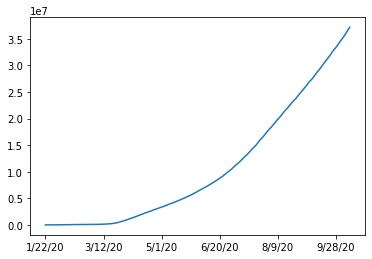

In [5]:
def global_confirmed_timeseries():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
    df = df.drop(['Country/Region', 'Province/State', 'Lat', 'Long'], axis=1).sum(axis=0)
    return df
global_confirmed_timeseries().plot()

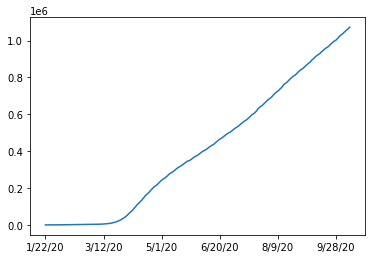

In [6]:
def global_deaths_timeseries():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
    df = df.drop(['Country/Region', 'Province/State', 'Lat', 'Long'], axis=1).sum(axis=0)
    return df
global_deaths_timeseries().plot()

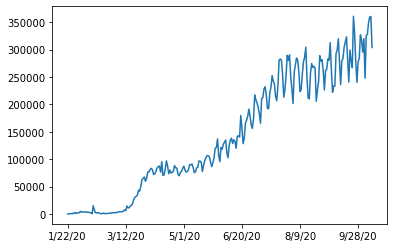

In [7]:
def global_new_confirmed_timeseries():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
    df = df.drop(['Country/Region', 'Province/State', 'Lat', 'Long'], axis=1).sum(axis=0).diff().fillna(value=0)
    return df
global_new_confirmed_timeseries().plot()

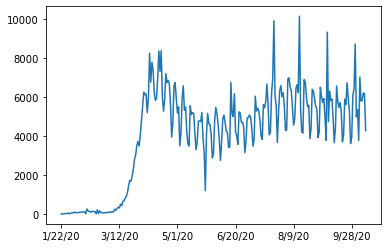

In [8]:
def global_new_deaths_timeseries():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
    df = df.drop(['Country/Region', 'Province/State', 'Lat', 'Long'], axis=1).sum(axis=0).diff().fillna(value=0)
    return df
global_new_deaths_timeseries().plot()

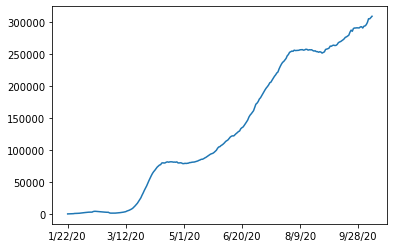

In [9]:
def global_new_confirmed_14day_moving_average():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
    df = df.drop(['Country/Region', 'Province/State', 'Lat', 'Long'], axis=1).sum(axis=0).diff().fillna(value=0).rolling(14, min_periods=1).mean()
    return df
global_new_confirmed_14day_moving_average().plot()

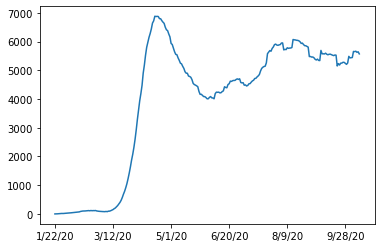

In [10]:
def global_new_deaths_14day_moving_average():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
    df = df.drop(['Country/Region', 'Province/State', 'Lat', 'Long'], axis=1).sum(axis=0).diff().fillna(value=0).rolling(14, min_periods=1).mean()
    return df
global_new_deaths_14day_moving_average().plot()

In [11]:
def global_confirmed_timeseries_by_country():
    t0 = datetime.now()
    t1 = t0 - timedelta(days=1)
    t_1 = '{0}/{1}/{2}'.format(t1.month, t1.day, t1.year % 1000)
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
    df = df.drop(['Province/State', 'Lat', 'Long'], axis=1)
    df = df.groupby(['Country/Region']).sum().sort_values([t_1], ascending=False)
    return df
global_confirmed_timeseries_by_country()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
US,1,1,2,2,5,5,5,6,6,8,...,7277791,7332297,7382341,7417845,7457402,7499341,7549682,7605873,7663293,7717932
India,0,0,0,0,0,0,0,0,1,1,...,6394068,6473544,6549373,6623815,6685082,6757131,6835655,6906151,6979423,7053806
Brazil,0,0,0,0,0,0,0,0,0,0,...,4847092,4847092,4906833,4915289,4927235,4969141,5000694,5028444,5055888,5055888
Russia,0,0,0,0,0,0,0,0,0,2,...,1179634,1188928,1198663,1209039,1219796,1231277,1242258,1253603,1265572,1278245
Colombia,0,0,0,0,0,0,0,0,0,0,...,835339,841532,848147,855052,862158,869808,877684,886179,894300,902747
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Laos,0,0,0,0,0,0,0,0,0,0,...,23,23,23,23,23,23,23,23,23,23
Saint Kitts and Nevis,0,0,0,0,0,0,0,0,0,0,...,19,19,19,19,19,19,19,19,19,19
Holy See,0,0,0,0,0,0,0,0,0,0,...,12,12,12,12,12,12,12,12,12,12


In [12]:
def global_deaths_timeseries_by_country():
    t0 = datetime.now()
    t1 = t0 - timedelta(days=1)
    t_1 = '{0}/{1}/{2}'.format(t1.month, t1.day, t1.year % 1000)
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
    df = df.drop(['Province/State', 'Lat', 'Long'], axis=1)
    df = df.groupby(['Country/Region']).sum().sort_values([t_1], ascending=False)
    return df
global_deaths_timeseries_by_country()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
US,0,0,0,0,0,0,0,0,0,0,...,207790,208697,209384,209721,210181,210886,211801,212762,213752,214370
Brazil,0,0,0,0,0,0,0,0,0,0,...,144680,144680,145987,146352,146675,147494,148228,148957,149639,149639
India,0,0,0,0,0,0,0,0,0,0,...,99773,100842,101782,102685,103569,104555,105526,106490,107416,108334
Mexico,0,0,0,0,0,0,0,0,0,0,...,78078,78492,78880,79088,81877,82348,82726,83096,83497,83642
United Kingdom,0,0,0,0,0,0,0,0,0,0,...,42292,42358,42407,42440,42459,42535,42605,42682,42769,42850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Grenada,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Seychelles,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Holy See,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
def global_new_confirmed_timeseries_by_country():
    t0 = datetime.now()
    t1 = t0 - timedelta(days=1)
    t_1 = '{0}/{1}/{2}'.format(t1.month, t1.day, t1.year % 1000)
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
    df = df.drop(['Province/State', 'Lat', 'Long'], axis=1)
    df = df.groupby(['Country/Region']).sum().diff(axis=1).fillna(value=0).sort_values([t_1], ascending=False)
    return df
global_new_confirmed_timeseries_by_country()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
India,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,81484.0,79476.0,75829.0,74442.0,61267.0,72049.0,78524.0,70496.0,73272.0,74383.0
US,0.0,0.0,1.0,0.0,3.0,0.0,0.0,1.0,0.0,2.0,...,44749.0,54506.0,50044.0,35504.0,39557.0,41939.0,50341.0,56191.0,57420.0,54639.0
United Kingdom,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,6929.0,6994.0,12885.0,22965.0,12603.0,14557.0,14173.0,17550.0,13888.0,15175.0
Russia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,8835.0,9294.0,9735.0,10376.0,10757.0,11481.0,10981.0,11345.0,11969.0,12673.0
Argentina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14001.0,14687.0,11129.0,7668.0,11242.0,14740.0,16447.0,15454.0,15099.0,12414.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Monaco,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,1.0,0.0,1.0,1.0,3.0,2.0,4.0,0.0
Dominica,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
Djibouti,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0


In [14]:
global_new_confirmed_timeseries_by_country().rolling(7, axis=1, min_periods=1).mean()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
India,0.0,0.0,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.142857,0.142857,...,82214.000000,81373.142857,79548.714286,78444.714286,77113.000000,75909.714286,74724.428571,73154.714286,72268.428571,72061.857143
US,0.0,0.0,0.333333,0.25,0.8,0.666667,0.571429,0.714286,0.714286,0.857143,...,41920.714286,42480.857143,43219.714286,43088.571429,43980.714286,43957.714286,45234.285714,46868.857143,47285.142857,47941.571429
United Kingdom,0.0,0.0,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.285714,...,6269.428571,6286.000000,7262.428571,9728.857143,10949.857143,12007.142857,13015.142857,14532.428571,15517.285714,15844.428571
Russia,0.0,0.0,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.285714,...,7951.142857,8262.857143,8593.428571,8966.571429,9356.714286,9835.571429,10208.428571,10567.000000,10949.142857,11368.857143
Argentina,0.0,0.0,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,12390.857143,12636.285714,12619.142857,12451.571429,12370.857143,12551.285714,12844.857143,13052.428571,13111.285714,13294.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Monaco,0.0,0.0,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,1.857143,1.714286,1.714286,1.571429,1.428571,1.285714,1.428571,1.714286,1.571429
Dominica,0.0,0.0,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,1.000000,0.142857,0.142857,0.142857,0.142857,0.000000,0.142857,0.142857
Djibouti,0.0,0.0,0.000000,0.00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.428571,1.142857,1.285714,1.428571,1.571429,1.000000,1.000000,0.857143,0.857143,0.714286


In [15]:
def global_new_deaths_timeseries_by_country():
    t0 = datetime.now()
    t1 = t0 - timedelta(days=1)
    t_1 = '{0}/{1}/{2}'.format(t1.month, t1.day, t1.year % 1000)
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
    df = df.drop(['Province/State', 'Lat', 'Long'], axis=1)
    df = df.groupby(['Country/Region']).sum().diff(axis=1).fillna(value=0).sort_values([t_1], ascending=False)
    return df
global_new_deaths_timeseries_by_country()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
India,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1095.0,1069.0,940.0,903.0,884.0,986.0,971.0,964.0,926.0,918.0
US,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,858.0,907.0,687.0,337.0,460.0,705.0,915.0,961.0,990.0,618.0
Argentina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3351.0,311.0,196.0,223.0,450.0,359.0,399.0,484.0,515.0,356.0
Iran,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,211.0,187.0,179.0,211.0,235.0,227.0,239.0,230.0,210.0,195.0
Russia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,166.0,185.0,172.0,107.0,115.0,184.0,196.0,184.0,198.0,194.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Nicaragua,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
New Zealand,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Finland,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [16]:
global_new_deaths_timeseries_by_country().rolling(7, axis=1, min_periods=1).mean()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20
Country/Region,,,,,,,,,,,,,,,,,,,,,
India,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1069.000000,1066.142857,1039.857143,1020.428571,1035.857143,1008.285714,978.285714,959.571429,939.142857,936.000000
US,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,713.142857,706.714286,699.142857,709.285714,729.857143,700.000000,695.571429,710.285714,722.142857,712.285714
Argentina,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,788.857143,770.142857,750.285714,752.714286,765.000000,758.285714,755.571429,346.000000,375.142857,398.000000
Iran,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,195.000000,192.142857,193.142857,195.428571,201.857143,204.714286,212.714286,215.428571,218.714286,221.000000
Russia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,132.714286,144.000000,144.714286,145.857143,153.714286,157.571429,160.714286,163.285714,165.142857,168.285714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Nicaragua,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.285714,0.285714,0.285714,0.285714,0.285714,0.000000,0.285714,0.285714,0.285714,0.285714
New Zealand,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Finland,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.142857,0.285714,0.285714,0.285714,0.142857,0.142857,0.285714,0.285714,0.142857,0.142857


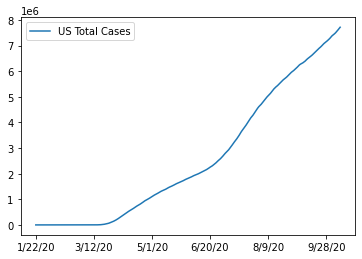

In [17]:
def us_total_confirmed_cases():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
    df = df.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key'], axis=1).sum().fillna(value=0)
    return pd.DataFrame({'US Total Cases': df})
us_total_confirmed_cases().plot()

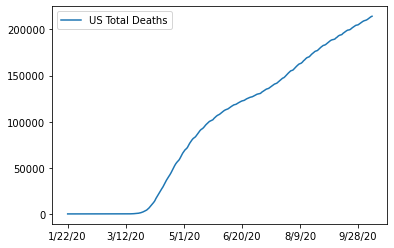

In [18]:
def us_total_deaths():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')
    df = df.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key', 'Population'], axis=1).sum().fillna(value=0)
    return pd.DataFrame({'US Total Deaths': df})
us_total_deaths().plot()

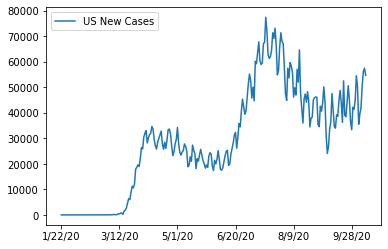

In [19]:
def us_new_confirmed_cases():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
    df = df.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key'], axis=1).sum().diff().fillna(value=0)
    return pd.DataFrame({'US New Cases': df})
us_new_confirmed_cases().plot()

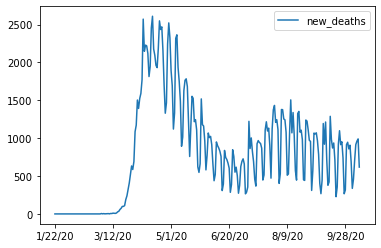

In [20]:
def us_new_deaths():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')
    df = df.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key', 'Population'], axis=1).sum().diff().fillna(value=0)
    return pd.DataFrame({'new_deaths': df})
us_new_deaths().plot()

,new_confirmed
Province_State,
Missouri,4679
Texas,3724
California,3334
Illinois,2905
Wisconsin,2742
North Carolina,2321
Indiana,1918
Nebraska,1828
Tennessee,1646


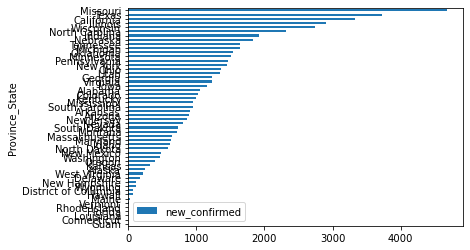

In [21]:
def new_confirmed_cases_by_state():
    t0 = datetime.now()
    t1 = t0 - timedelta(days=1)
    t2 = t0 - timedelta(days=2)
    t_1 = '{0}/{1}/{2}'.format(t1.month, t1.day, t1.year % 1000)
    t_2 = '{0}/{1}/{2}'.format(t2.month, t2.day, t2.year % 1000)
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
    df = df[~df.Province_State.isin(exclude)]
    df = df.groupby(['Province_State'])[['Province_State', t_1, t_2]].sum()
    df['new_confirmed'] = pd.Series(df[t_1] - df [t_2], index=df.index)
    df = df.drop([t_1, t_2], axis=1)
    return df.sort_values(['new_confirmed'], ascending=False)
new_confirmed_cases_by_state().sort_values(['new_confirmed'], ascending=True).plot.barh()
new_confirmed_cases_by_state()

,new_deaths
Province_State,
California,81
Texas,72
Georgia,45
Pennsylvania,32
Illinois,30
Missouri,27
Tennessee,26
Arkansas,22
South Carolina,21


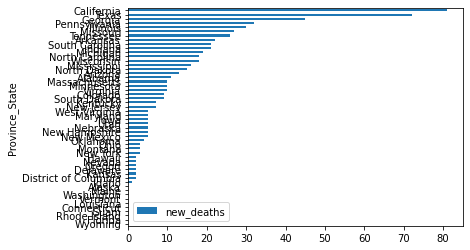

In [22]:
def new_deaths_by_state():
    t0 = datetime.now()
    t1 = t0 - timedelta(days=1)
    t2 = t0 - timedelta(days=2)
    t_1 = '{0}/{1}/{2}'.format(t1.month, t1.day, t1.year % 1000)
    t_2 = '{0}/{1}/{2}'.format(t2.month, t2.day, t2.year % 1000)
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')
    df = df[~df.Province_State.isin(exclude)]
    df = df.groupby(['Province_State'])[['Province_State', t_1, t_2]].sum()
    df['new_deaths'] = pd.Series(df[t_1] - df [t_2], index=df.index)
    df = df.drop([t_1, t_2], axis=1)
    return df.sort_values(['new_deaths'], ascending=False)
new_deaths_by_state().sort_values(['new_deaths'], ascending=True).plot.barh()
new_deaths_by_state()

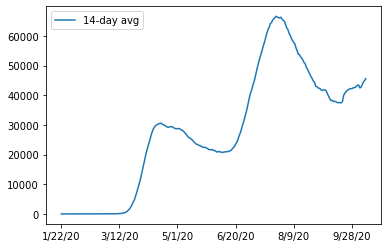

In [23]:
def us_new_cases_14day_moving_avg():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
    df = df.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key'], axis=1).sum().diff().fillna(value=0).rolling(14, min_periods=1).mean()
    return pd.DataFrame({'14-day avg': df})
us_new_cases_14day_moving_avg().plot()

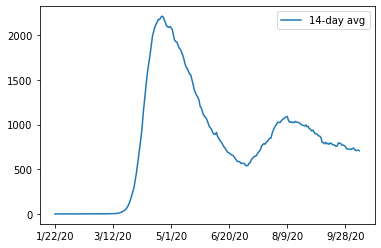

In [24]:
def us_new_deaths_14day_moving_avg():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')
    df = df.drop(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State', 'Country_Region', 'Lat', 'Long_', 'Combined_Key', 'Population'], axis=1).sum().diff().fillna(value=0).rolling(14, min_periods=1).mean()
    return pd.DataFrame({'14-day avg': df})
us_new_deaths_14day_moving_avg().plot()

In [25]:
def confirmed_timeseries_by_state():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
    df = df.drop(['UID','code3','FIPS', 'Lat', 'Long_'], axis=1)
    df = df.groupby(['Province_State']).sum().sort_values(['Province_State'], ascending=True)
    return df
confirmed_timeseries_by_state()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,0,0,0,...,155744,156698,158380,159169,159713,160477,161418,161975,163465,164526
Alaska,0,0,0,0,0,0,0,0,0,0,...,7948,8073,8217,8405,8613,8752,8878,9005,9182,9431
American Samoa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Arizona,0,0,0,0,1,1,1,1,1,1,...,219212,219763,220399,220754,221070,221934,222538,223401,224084,224978
Arkansas,0,0,0,0,0,0,0,0,0,0,...,84821,85779,86525,87013,87430,88071,88880,90145,91312,92220
California,0,0,0,0,2,2,2,2,2,3,...,822205,826013,829521,832713,835507,838202,841928,845270,849076,852410
Colorado,0,0,0,0,0,0,0,0,0,0,...,71197,71876,72533,73054,73515,74169,74899,75761,76595,77618
Connecticut,0,0,0,0,0,0,0,0,0,0,...,57742,58297,58297,58297,59120,59241,59364,59748,60038,60038
Delaware,0,0,0,0,0,0,0,0,0,0,...,20787,20937,21125,21243,21363,21466,21550,21682,21827,21998


In [26]:
def deaths_timeseries_by_state():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')
    df = df.drop(['Population','UID','code3','FIPS', 'Lat', 'Long_'], axis=1)
    df = df.groupby(['Province_State']).sum().sort_values(['Province_State'], ascending=True)
    return df
deaths_timeseries_by_state()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,0,0,0,...,2548,2550,2558,2558,2559,2580,2601,2637,2653,2664
Alaska,0,0,0,0,0,0,0,0,0,0,...,57,57,58,58,58,58,59,60,60,60
American Samoa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Arizona,0,0,0,0,0,0,0,0,0,0,...,5674,5693,5705,5706,5707,5713,5733,5743,5746,5759
Arkansas,0,0,0,0,0,0,0,0,0,0,...,1384,1391,1407,1425,1447,1469,1482,1503,1530,1552
California,0,0,0,0,0,0,0,0,0,0,...,15973,16054,16115,16147,16171,16244,16338,16418,16486,16567
Colorado,0,0,0,0,0,0,0,0,0,0,...,2054,2057,2060,2068,2069,2081,2085,2095,2103,2112
Connecticut,0,0,0,0,0,0,0,0,0,0,...,4511,4513,4513,4513,4517,4521,4522,4527,4530,4530
Delaware,0,0,0,0,0,0,0,0,0,0,...,636,642,645,645,645,646,649,651,651,653


In [27]:
def new_confirmed_timeseries_by_state():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_US.csv')
    df = df.drop(['UID','code3','FIPS', 'Lat', 'Long_'], axis=1)
    df = df.groupby(['Province_State']).sum().diff(axis=1).fillna(value=0).sort_values(['Province_State'], ascending=True)
    return df
new_confirmed_timeseries_by_state()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1043.0,954.0,1682.0,789.0,544.0,764.0,941.0,557.0,1490.0,1061.0
Alaska,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,124.0,125.0,144.0,188.0,208.0,139.0,126.0,127.0,177.0,249.0
American Samoa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Arizona,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,705.0,551.0,636.0,355.0,316.0,864.0,604.0,863.0,683.0,894.0
Arkansas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1124.0,958.0,746.0,488.0,417.0,641.0,809.0,1265.0,1167.0,908.0
California,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,...,3090.0,3808.0,3508.0,3192.0,2794.0,2695.0,3726.0,3342.0,3806.0,3334.0
Colorado,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,682.0,679.0,657.0,521.0,461.0,654.0,730.0,862.0,834.0,1023.0
Connecticut,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,192.0,555.0,0.0,0.0,823.0,121.0,123.0,384.0,290.0,0.0
Delaware,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,174.0,150.0,188.0,118.0,120.0,103.0,84.0,132.0,145.0,171.0


In [28]:
def new_deaths_timeseries_by_state():
    df = pd.read_csv('csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_US.csv')
    df = df.drop(['Population','UID','code3','FIPS', 'Lat', 'Long_'], axis=1)
    df = df.groupby(['Province_State']).sum().diff(axis=1).fillna(value=0).sort_values(['Province_State'], ascending=True)
    return df
new_deaths_timeseries_by_state()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,10/1/20,10/2/20,10/3/20,10/4/20,10/5/20,10/6/20,10/7/20,10/8/20,10/9/20,10/10/20
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,2.0,8.0,0.0,1.0,21.0,21.0,36.0,16.0,11.0
Alaska,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
American Samoa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Arizona,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,24.0,19.0,12.0,1.0,1.0,6.0,20.0,10.0,3.0,13.0
Arkansas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15.0,7.0,16.0,18.0,22.0,22.0,13.0,21.0,27.0,22.0
California,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,88.0,81.0,61.0,32.0,24.0,73.0,94.0,80.0,68.0,81.0
Colorado,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,3.0,3.0,8.0,1.0,12.0,4.0,10.0,8.0,9.0
Connecticut,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,3.0,2.0,0.0,0.0,4.0,4.0,1.0,5.0,3.0,0.0
Delaware,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,6.0,3.0,0.0,0.0,1.0,3.0,2.0,0.0,2.0
